In [1]:
#import bibliotek
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [2]:
#wczytanie danych
#nagłowki w kolumnach
df = pd.read_csv('.\dane\driving_log.csv',names=['center','left','right','steeing_angle','throttle','break','speed'])

In [3]:
df.head()

,center,left,right,steeing_angle,throttle,break,speed
0,C:\DATAWORKSHOP\5DW_Challenge\part3\day3\dane\...,C:\DATAWORKSHOP\5DW_Challenge\part3\day3\dane\...,C:\DATAWORKSHOP\5DW_Challenge\part3\day3\dane\...,0.0,0.0,0,0.000002
1,C:\DATAWORKSHOP\5DW_Challenge\part3\day3\dane\...,C:\DATAWORKSHOP\5DW_Challenge\part3\day3\dane\...,C:\DATAWORKSHOP\5DW_Challenge\part3\day3\dane\...,0.0,0.0,0,0.000014
2,C:\DATAWORKSHOP\5DW_Challenge\part3\day3\dane\...,C:\DATAWORKSHOP\5DW_Challenge\part3\day3\dane\...,C:\DATAWORKSHOP\5DW_Challenge\part3\day3\dane\...,0.0,0.0,0,0.000005
3,C:\DATAWORKSHOP\5DW_Challenge\part3\day3\dane\...,C:\DATAWORKSHOP\5DW_Challenge\part3\day3\dane\...,C:\DATAWORKSHOP\5DW_Challenge\part3\day3\dane\...,0.0,0.0,0,0.000003
4,C:\DATAWORKSHOP\5DW_Challenge\part3\day3\dane\...,C:\DATAWORKSHOP\5DW_Challenge\part3\day3\dane\...,C:\DATAWORKSHOP\5DW_Challenge\part3\day3\dane\...,0.0,0.0,0,0.000010


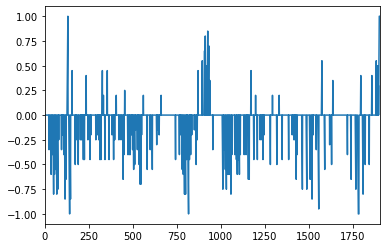

In [4]:
#wizualizacja danych
#kat skretu kierownicy
df['steeing_angle'].plot()


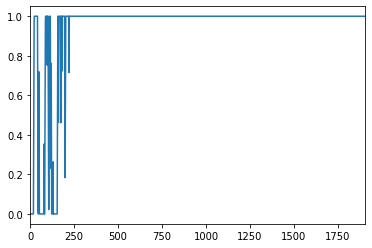

In [5]:
#wizualizacja danych
df['throttle'].plot()

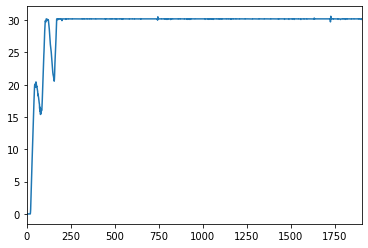

In [6]:
#wizualizacja danych
#predkosc pojazu
df['speed'].plot()

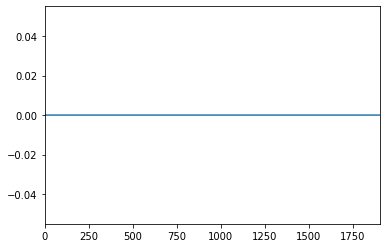

In [7]:
#wizualizacja dnaych
#brak hamowania
df['break'].plot()

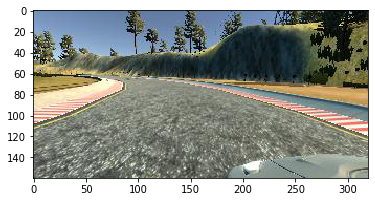

In [8]:
#otwarcie przykladowego obrazu z lewego lusterka
img = Image.open(df['left'][0])
plt.imshow(img)

In [9]:
#rozmiary obrazu
img = np.asarray(img)
img.shape

(160, 320, 3)

In [10]:
#funkcje pomocniczne do obrobki obrazu 
def loadImage(fname):
    return np.asarray(Image.open(fname))
def process_image(img):
    return img[10:130:2,::4,:]

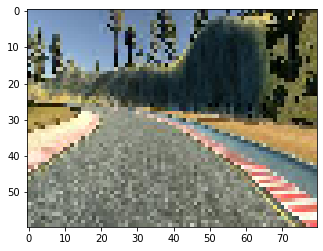

In [11]:
#obraz po przerobce za pomoca funkcji pomocniczych
img = process_image(loadImage(df['center'][0]))
plt.imshow(img)

In [12]:
#obrobka zdjec 
X = [ process_image(loadImage(fname)) for fname in df ['center']]
X += [ process_image(loadImage(fname)) for fname in df ['left']]
X += [ process_image(loadImage(fname)) for fname in df ['right']]

y = np.array(df['steeing_angle'])
y = np.concatenate([y,y+0.4,y-0.4])#y+0.4 - chcemy mocniej skrecic w prawo, y-0.4 chcemy skrecic mocniej w lewo

In [13]:
#ilosc i rozmiar po obrobce
X = np.array(X)
print(X.shape)
print(y.shape)

(5712, 60, 80, 3)
(5712,)


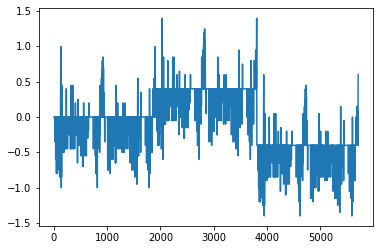

In [14]:
#wizualizacja danych
plt.plot(y)
plt.show()

In [15]:
#zapisanie dnaych do plikow
np.save('X.npy',X)
np.save('y.npy',y)
